In [4]:
#Importing the dependencies
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install pandas seaborn matplotlib


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 9.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 10.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 9.6 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 8.3 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 7.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 6.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 6.1 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df = pd.read_csv("C:\\Users\\OMEN\\Downloads\\ai_financial_market_daily_realistic_synthetic.csv")


In [8]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [12]:
#basic information about the data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


#Feature Enginneering /Extraction

In [11]:
df['Date']=pd.to_datetime(df['Date'])
    

In [17]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [14]:
#show the companies name
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [18]:
#create new column for year only 
df['Year']=df['Date'].dt.year

**DATA ANALYSIS**



In [20]:
#checking for any null or missing values 
df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
Year                       0
dtype: int64

In [21]:
df[df['Event'] == 'GPT-4 release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


**How much amount the companies spent on R&D?**


In [62]:
print("Companies spending for R&D ")
expen=df.groupby('Company')['R&D_Spending_USD_Mn'].sum()
expen


Companies spending for R&D 


Company
Google    423341.14
Meta      264533.07
OpenAI     26482.77
Name: R&D_Spending_USD_Mn, dtype: float64

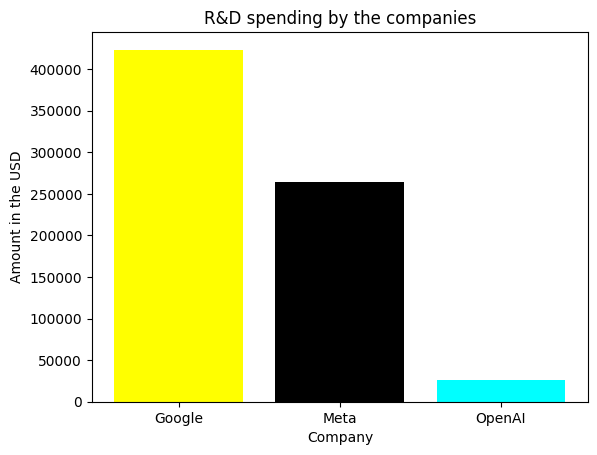

In [28]:
#Drwing bar plot tos how the amount spent on R & D by the comapnies
plt.bar(RD.index,RD.values,color=['yellow','black','cyan'])
plt.title("R&D spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in the USD")
plt.show()

**REVENUED EARNED BY THE COMAPNIES**

In [31]:
revenue=df.groupby('Company')['AI_Revenue_USD_Mn'].sum()
revenue

Company
Google    284498.38
Meta      189621.82
OpenAI      9462.89
Name: AI_Revenue_USD_Mn, dtype: float64

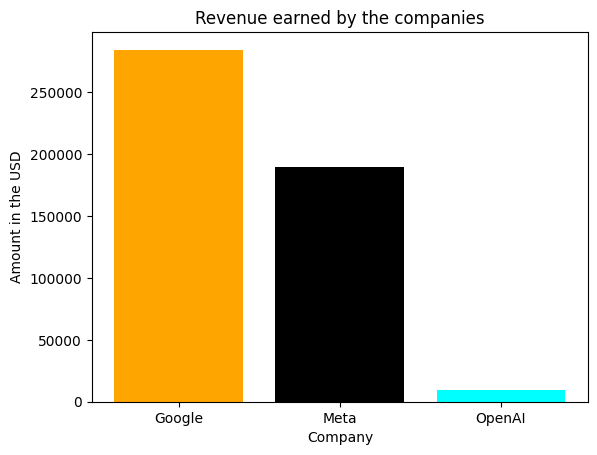

In [34]:
#Drwing bar plot tos how the revenue earned by the comapnies
plt.bar(revenue.index,revenue.values,color=['orange','black','cyan'])
plt.title("Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in the USD")
plt.show()

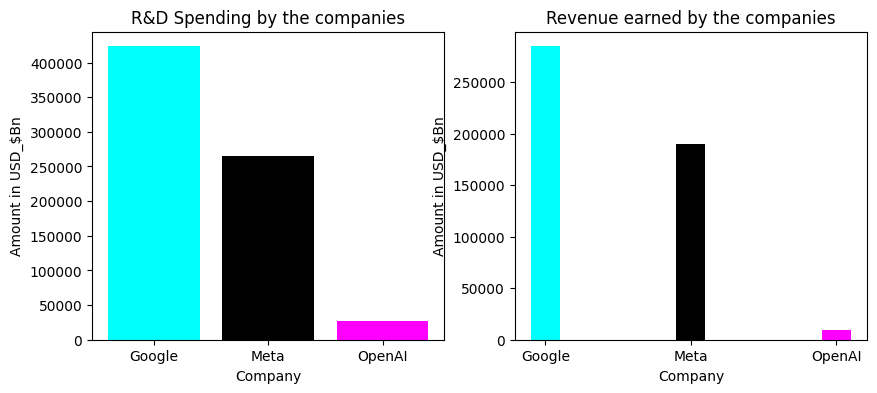

In [36]:
#bar plots to show the expenditure and revenue of the comapnies
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(RD.index, RD.values, color = ['cyan', 'black', 'magenta'])
plt.title( "R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.subplot(1,2,2)
plt.bar(revenue.index, revenue.values, color = ['cyan', 'black', 'magenta'], width = 0.2)
plt.title( "Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.show()

**Datewise impact on the stock**



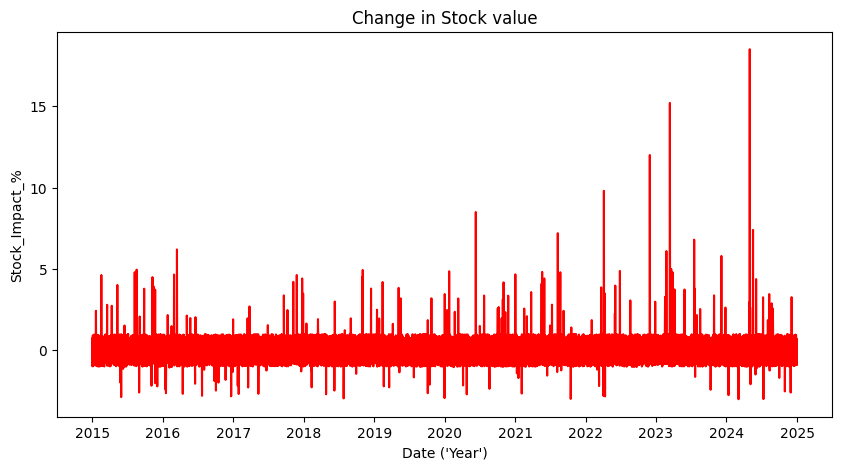

In [38]:
plt.figure(figsize = (10,5))

plt.plot(df['Date'], df['Stock_Impact_%'], color = 'red')

plt.title("Change in Stock value")
plt.xlabel("Date ('Year')")
plt.ylabel("Stock_Impact_%")

plt.show()


**Creating seperate dataframes for the comapany and checking i the datewise stock impact**

In [39]:
data_openai =  df [df['Company'] == 'OpenAI']
data_google = df [df['Company'] == 'Google']
data_meta = df [df['Company'] == 'Meta']


In [40]:
data_meta

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


**Datewise stock impact for comapny:openai**


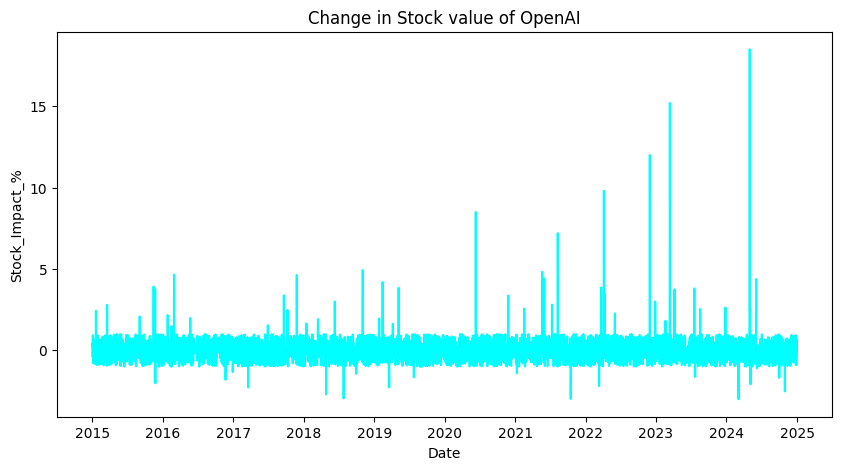

In [41]:
plt.figure(figsize = (10,5))

plt.plot(data_openai['Date'], data_openai['Stock_Impact_%'], color = 'cyan')

plt.title("Change in Stock value of OpenAI")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

plt.show()

**Datewise stock impact comapny:Google**


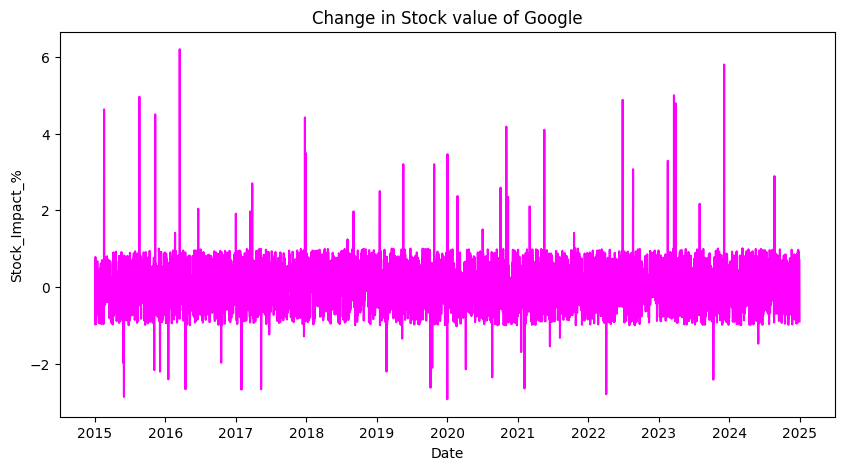

In [45]:
plt.figure(figsize = (10,5))

plt.plot( data_google['Date'], data_google['Stock_Impact_%'], color = 'magenta')
plt.title("Change in Stock value of Google")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

plt.show()


**Datewise stock impact for comapny:Meta**

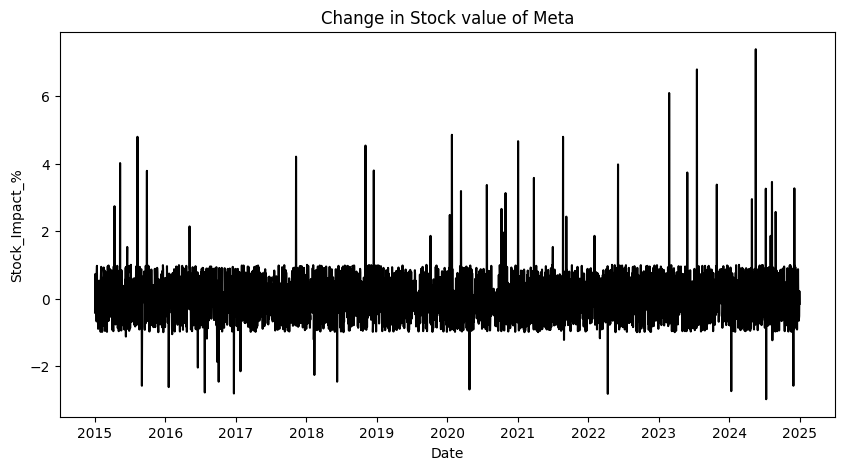

In [49]:
plt.figure(figsize = (10,5))

plt.plot( data_meta['Date'], data_meta['Stock_Impact_%'], color = 'black' )
plt.title("Change in Stock value of Meta")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")

plt.show()

In [50]:
# Google's Events when Maximum Stock Impact was observed

data_google.sort_values( by = 'Stock_Impact_%', ascending = False )

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [52]:
# Meta's Events when Maximum Stock Impact was observed

data_meta.sort_values(by = 'Stock_Impact_%', ascending = False )

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
7526,2015-08-09,Meta,48.97,19.95,-0.27,AI Video Recommendation upgrade,4.80,2015
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


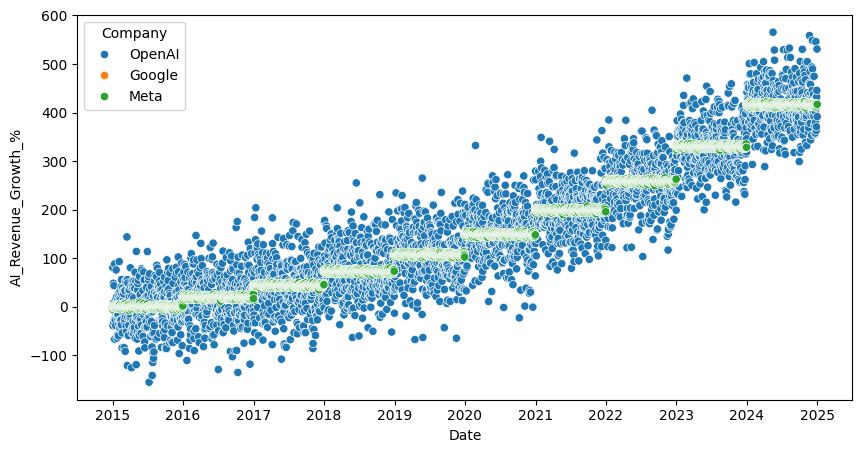

In [53]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = 'Date', y = 'AI_Revenue_Growth_%', data = df, hue = 'Company')

plt.show()

**AI revenue growth of company:openai**

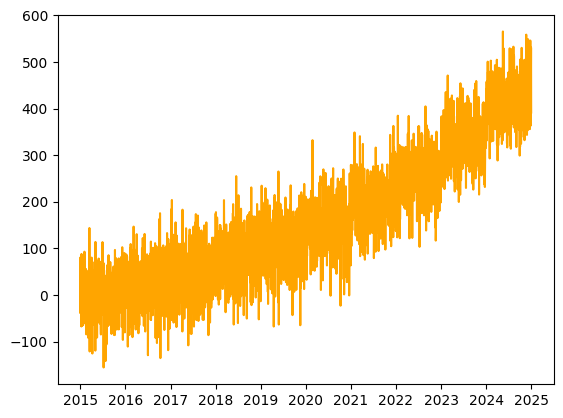

In [56]:
plt.plot( data_openai['Date'], data_openai['AI_Revenue_Growth_%'], color = 'orange')

plt.show()

**AI revenue growth of company:Google**

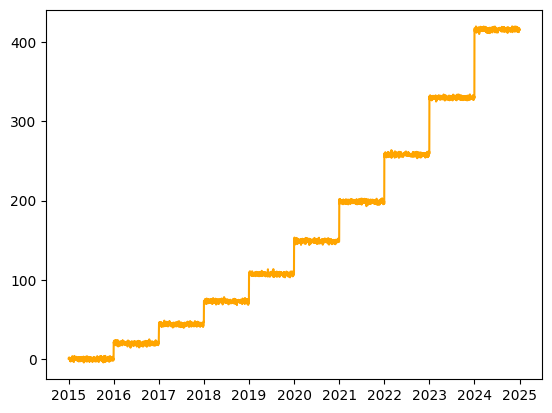

In [57]:
plt.plot( data_google['Date'], data_google['AI_Revenue_Growth_%'], color = 'orange')

plt.show()

**AI revenue growth of company:Meta**

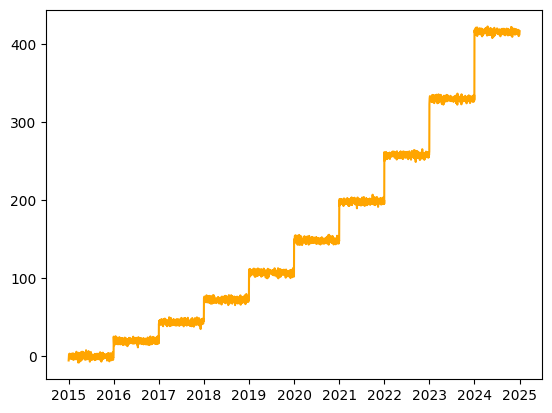

In [59]:
# Meta's AI Revenue Growth year-by-year

plt.plot( data_meta['Date'], data_meta['AI_Revenue_Growth_%'], color = 'orange')

plt.show()

<Axes: >

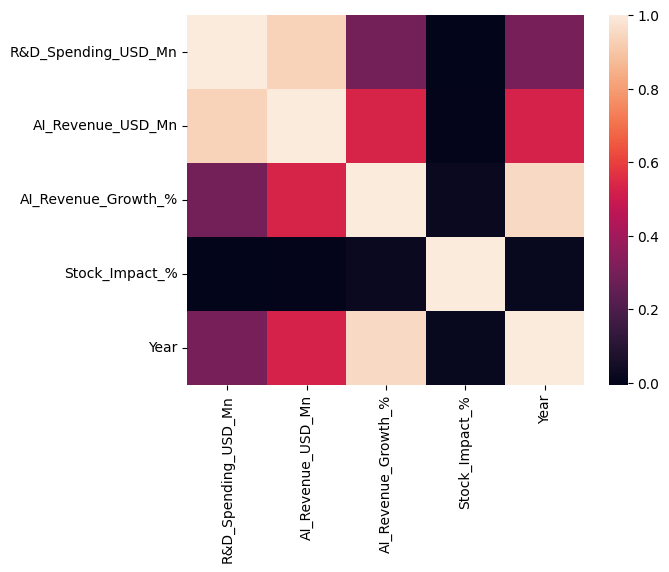

In [60]:
sns.heatmap( df.corr(numeric_only = True) )

**Expenditure VS Revenue Year by Year**

In [69]:
spend = df.groupby('Year')['R&D_Spending_USD_Mn'].sum()

spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

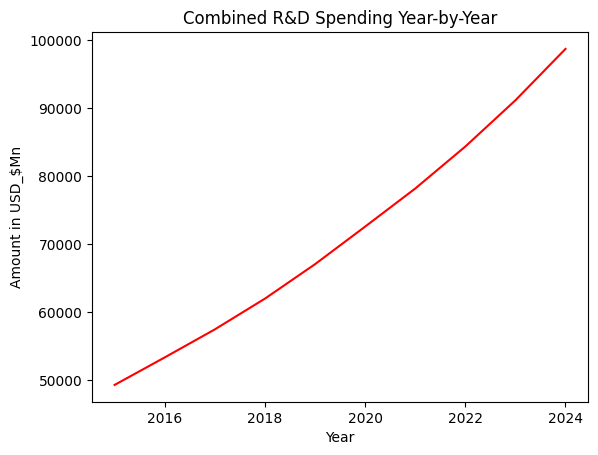

In [70]:
# Showing the Amounnt spent on R & D

plt.plot(spend.index, spend.values, color = 'r')

plt.title("Combined R&D Spending Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.show()

In [71]:
revenue = df.groupby('Year')['AI_Revenue_USD_Mn'].sum()

revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

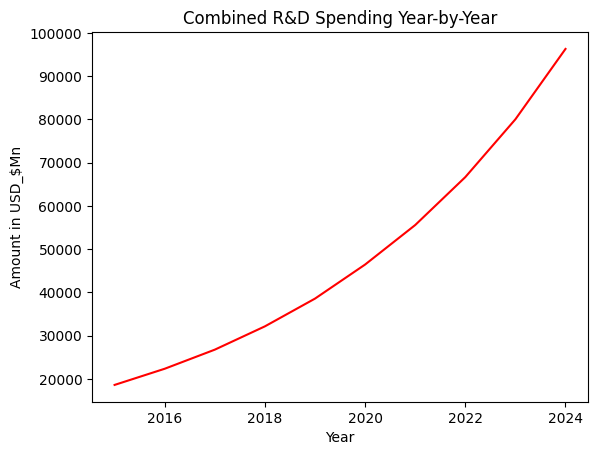

In [72]:
# Showing the Amounnt spent on R & D

plt.plot(revenue.index, revenue.values, color = 'r')

plt.title("Combined R&D Spending Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.show()

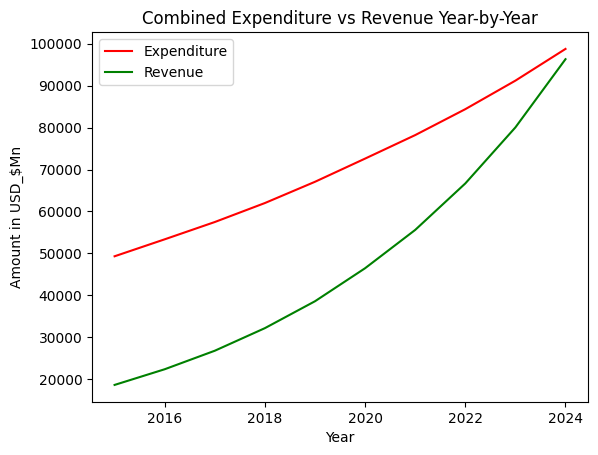

In [73]:
plt.plot(spend.index, spend.values, color = 'r')
plt.plot( revenue.index, revenue.values, color = 'g')

plt.title( "Combined Expenditure vs Revenue Year-by-Year", fontsize = 12)
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.legend(['Expenditure', 'Revenue'])

plt.show()

In [74]:
# Showing the various Events

df.Event.value_counts()

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [75]:
df[df.Event =='TensorFlow open-source release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,2015


**#checking for the days 10 days before and after the event**

In [76]:
tf = df.loc[ 3955 : 3975 ]

tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43,2015
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,2015
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72,2015
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61,2015


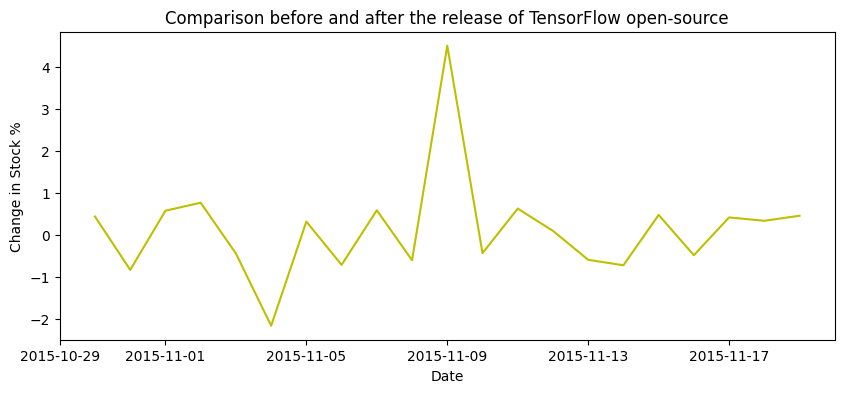

In [77]:
plt.figure(figsize = (10,4))

plt.plot( tf['Date'], tf['Stock_Impact_%'], color = 'y')
plt.title("Comparison before and after the release of TensorFlow open-source")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")

plt.show()

In [79]:
df[df.Event =='GPT-3 release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
1988,2020-06-11,OpenAI,5.9,2.62,161.56,GPT-3 release,8.5,2020


In [80]:
gpt=df.loc[1977:1999]
gpt

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
1977,2020-05-31,OpenAI,8.33,2.08,108.07,NaN,0.27,2020
1978,2020-06-01,OpenAI,7.72,3.38,238.41,NaN,-0.80,2020
1979,2020-06-02,OpenAI,6.19,2.55,154.71,NaN,-0.32,2020
1980,2020-06-03,OpenAI,7.93,2.60,159.80,NaN,-0.75,2020
1981,2020-06-04,OpenAI,6.37,1.84,83.58,NaN,-0.97,2020
1982,2020-06-05,OpenAI,7.75,3.47,246.69,NaN,0.90,2020
1983,2020-06-06,OpenAI,7.80,2.15,114.67,NaN,-0.73,2020
1984,2020-06-07,OpenAI,6.08,2.12,112.20,NaN,-0.34,2020
1985,2020-06-08,OpenAI,7.54,3.23,222.52,NaN,0.64,2020
1986,2020-06-09,OpenAI,6.63,2.62,162.19,NaN,0.47,2020


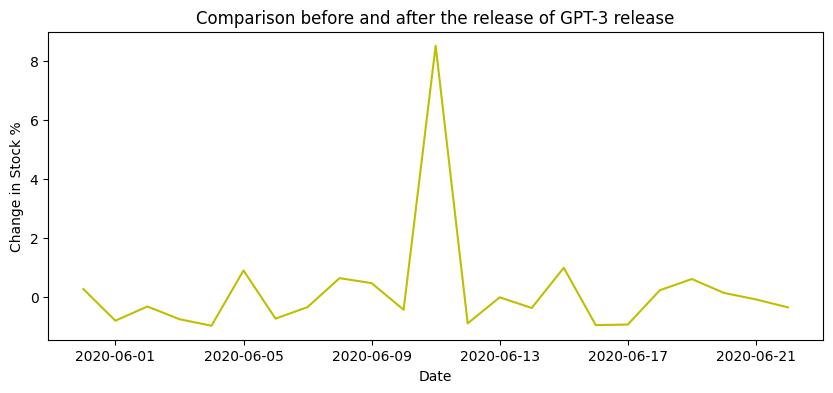

In [82]:
plt.figure(figsize = (10,4))

plt.plot( gpt['Date'], gpt['Stock_Impact_%'], color = 'y')
plt.title("Comparison before and after the release of GPT-3 release")
plt.xlabel("Date")
plt.ylabel("Change in Stock %")

plt.show()